In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
import zipfile,os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
TRAIN_DATA_DIR = '/content/drive/MyDrive/Synapsis-Test/FMD_DATASET_FIX/train'
TEST_DATA_DIR = '/content/drive/MyDrive/Synapsis-Test/FMD_DATASET_FIX/test'
IMAGE_SIZE = (150, 150)
INPUT_SHAPE = (150, 150, 3)
BATCH_SIZE = 32

In [5]:
train_datagen = ImageDataGenerator(
                                   rescale=1./255,
                                   validation_split=.2,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest'
                                   )

test_datagen = ImageDataGenerator(
                                  rescale=1./255,
                                  )

In [6]:
# Create train generator
train_gen = train_datagen.flow_from_directory(
                                              directory=TRAIN_DATA_DIR,
                                              target_size=IMAGE_SIZE,
                                              color_mode='rgb',
                                              class_mode='categorical',
                                              batch_size=BATCH_SIZE,
                                              subset='training'
                                              )

# Create validation generator
validation_gen = train_datagen.flow_from_directory(
                                                   directory=TRAIN_DATA_DIR,
                                                   target_size=IMAGE_SIZE,
                                                   color_mode='rgb',
                                                   class_mode='categorical',
                                                   batch_size=BATCH_SIZE,
                                                   subset='validation'
                                                   )

# Create test generator
test_gen = test_datagen.flow_from_directory(
                                              directory=TEST_DATA_DIR,
                                              target_size=IMAGE_SIZE,
                                              color_mode='rgb',
                                              class_mode='categorical',
                                              batch_size=BATCH_SIZE,
                                              shuffle=False
                                            )

Found 9303 images belonging to 3 classes.
Found 2325 images belonging to 3 classes.
Found 2908 images belonging to 3 classes.


In [7]:
classes_dict = train_gen.class_indices
print('Class and corresponding index:', classes_dict)

Class and corresponding index: {'incorrect_mask': 0, 'with_mask': 1, 'without_mask': 2}


In [53]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.regularizers import l2

In [54]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # 3 classes
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 17, 17, 128)     

In [55]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [56]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto')
checkpoint = ModelCheckpoint("/content/drive/MyDrive/Synapsis-Test/model/no-tl-kaggle-3.h5", monitor='val_accuracy', verbose=1, save_best_only=True)

In [57]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [ ]:
history = model.fit(
      train_gen,                    
      epochs=15,
      validation_data=validation_gen, 
      callbacks = [checkpoint],
      verbose=2
)

Epoch 1/15


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(



Epoch 1: val_accuracy improved from -inf to 0.75355, saving model to /content/drive/MyDrive/Synapsis-Test/model/no-tl-kaggle-3.h5
291/291 - 199s - loss: 1.2673 - accuracy: 0.8055 - val_loss: 0.8305 - val_accuracy: 0.7535 - 199s/epoch - 685ms/step
Epoch 2/15

Epoch 2: val_accuracy did not improve from 0.75355
291/291 - 203s - loss: 0.3100 - accuracy: 0.9331 - val_loss: 0.9130 - val_accuracy: 0.6770 - 203s/epoch - 697ms/step
Epoch 3/15

Epoch 3: val_accuracy improved from 0.75355 to 0.78366, saving model to /content/drive/MyDrive/Synapsis-Test/model/no-tl-kaggle-3.h5
291/291 - 204s - loss: 0.2365 - accuracy: 0.9494 - val_loss: 0.6138 - val_accuracy: 0.7837 - 204s/epoch - 700ms/step
Epoch 4/15

Epoch 4: val_accuracy did not improve from 0.78366
291/291 - 194s - loss: 0.2123 - accuracy: 0.9544 - val_loss: 0.7801 - val_accuracy: 0.7699 - 194s/epoch - 666ms/step
Epoch 5/15

Epoch 5: val_accuracy did not improve from 0.78366
291/291 - 202s - loss: 0.1936 - accuracy: 0.9566 - val_loss: 0.7404

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(16, 5))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [9]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Synapsis-Test/model/no-tl-kaggle-3.h5')

In [10]:
classes=['incorrect_mask', 'with_mask', 'without_mask']

In [11]:
total_nilai = []

for i in range (0,5):
    results = model.evaluate(test_gen)
    total_nilai.append(results)
    print(f"test loss {results[0]}, test accuracy {results[1]}")

91/91 [==============================] - 663s 7s/step - loss: 0.2514 - accuracy: 0.9381
test loss 0.25139525532722473, test accuracy 0.9381017684936523
91/91 [==============================] - 79s 862ms/step - loss: 0.2514 - accuracy: 0.9381
test loss 0.25139525532722473, test accuracy 0.9381017684936523
91/91 [==============================] - 79s 857ms/step - loss: 0.2514 - accuracy: 0.9381
test loss 0.25139525532722473, test accuracy 0.9381017684936523
91/91 [==============================] - 80s 879ms/step - loss: 0.2514 - accuracy: 0.9381
test loss 0.25139525532722473, test accuracy 0.9381017684936523
91/91 [==============================] - 79s 861ms/step - loss: 0.2514 - accuracy: 0.9381
test loss 0.25139525532722473, test accuracy 0.9381017684936523


In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy

Y_pred = model.predict(test_gen)
y_pred = numpy.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_gen.classes, y_pred))
print('Classification Report')
target_names=['incorrect_mask', 'with_mask', 'without_mask']
print(classification_report(test_gen.classes, y_pred,target_names=target_names))

91/91 [==============================] - 83s 904ms/step
Confusion Matrix
[[936  59   5]
 [  0 932  26]
 [  1  89 860]]
Classification Report
                precision    recall  f1-score   support

incorrect_mask       1.00      0.94      0.97      1000
     with_mask       0.86      0.97      0.91       958
  without_mask       0.97      0.91      0.93       950

      accuracy                           0.94      2908
     macro avg       0.94      0.94      0.94      2908
  weighted avg       0.94      0.94      0.94      2908



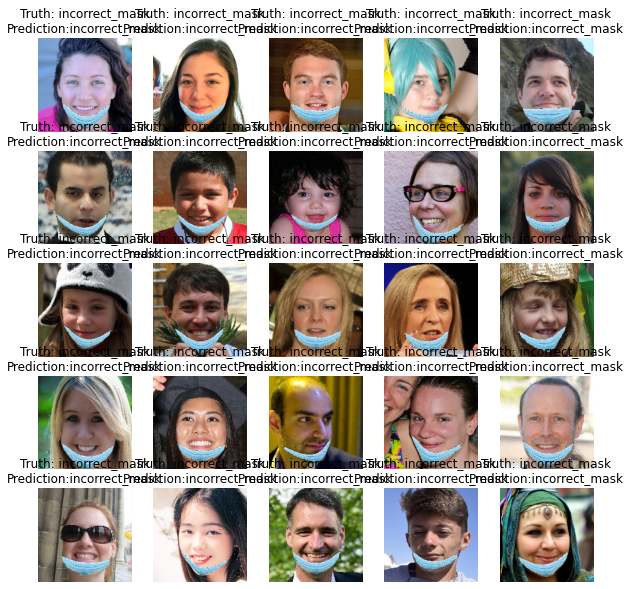

In [16]:
import numpy as np
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 10))
x, label= test_gen.next()
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x[i])
    result = np.where(label[i]==1)
    predict = model(tf.expand_dims(x[i], 0))
    score = tf.nn.softmax(predict[0])
    score_label = classes[np.argmax(score)]
    plt.title(f'Truth: {classes[result[0][0]]}\nPrediction:{score_label}')
    plt.axis(False)

1/1 [==============================] - 0s 62ms/step


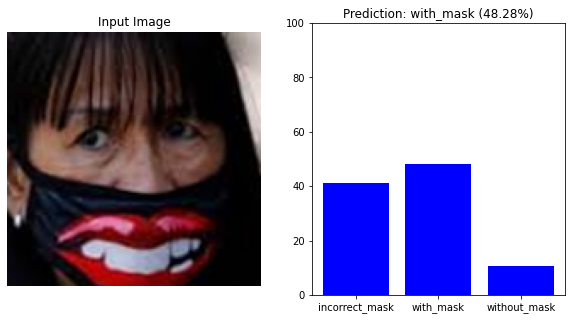

In [25]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load model yang telah dilatih sebelumnya
model = load_model('/content/drive/MyDrive/Synapsis-Test/model/no-tl-kaggle-3.h5')

# Daftar kelas yang akan diprediksi
classes=['incorrect_mask', 'with_mask', 'without_mask']

# Lakukan preprocessing pada gambar
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((150,150))
    image = np.array(image)/255.0
    image = np.expand_dims(image, axis=0)
    return image

# Prediksi gambar yang diinput oleh user
def predict(image_path):
    image = preprocess_image(image_path)
    prediction = model.predict(image)[0]
    class_idx = np.argmax(prediction)
    class_prob = prediction[class_idx]
    return classes[class_idx], class_prob, image[0]

# Input gambar dari user dan lakukan prediksi
image_path = '/content/drive/MyDrive/Synapsis-Test/FMD_DATASET_FIX/test/with_mask/complex/complex18.jpg'
result, prob, image = predict(image_path)

# Tampilkan hasil prediksi dan gambar
probs = model.predict(np.expand_dims(image, axis=0))[0]
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
ax1.imshow(image)
ax1.set_title('Input Image')
ax1.axis('off')
ax2.bar(classes, [np.round(p*100, 2) for p in probs], color='blue')
ax2.set_ylim([0, 100])
ax2.set_title(f'Prediction: {result} ({np.round(prob*100,2)}%)')
plt.show()